**Description:**

In this file, we apply the previously saved linear regression model to make predictions for the year 2022. Subsequently, we draw a comparison between these predictions and the real data observed by the EPA.

The initial step involves applying a logarithmic transformation to the observed gas pollutant values, followed by performing PCA to align with the model's input. Subsequently, the model's output undergoes a reverse logarithmic transformation to recover the original PM2.5 values.

In [2]:
import joblib
loaded_model = joblib.load("../Analysis_and_Model/PM2.5predictor.pkl")

In [3]:
import pandas as pd

df = pd.read_csv("../Data/pollution_data1622.csv")
df = df[df['Year'] == 2022]
df = df[df['State'] != 'District of Columbia']
df.head()

,Year,State,CO,NO2,SO2,O3,PM2.5
294,2022,Alabama,0.214251,8.540821,0.618796,0.040022,8.137220
295,2022,Arizona,0.283521,13.103308,0.625295,0.048485,7.560903
296,2022,Arkansas,0.367353,7.306716,0.602198,0.036992,8.427775
297,2022,California,0.312764,9.401368,0.478122,0.043129,8.928093
298,2022,Colorado,0.265575,8.028601,0.728189,0.047862,6.168845


In [4]:
# Check for null values and replace with mean
 
print(df.isnull().sum())
null_counts = df.isnull().sum()
for column in df.columns:
    if null_counts[column] > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

Year     0
State    0
CO       0
NO2      2
SO2      0
O3       0
PM2.5    0
dtype: int64


Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the columns to scale
numeric_columns_scale = ["CO", "NO2", "O3", "SO2"]

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])

# Apply PCA with 3 components, same as the model
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"])
# Add the 'State' column back
state_column = df["State"].reset_index(drop=True)
pca_df["State"] = state_column

print(pca_df)

         PC1       PC2       PC3           State
0  -0.037421 -0.460396  0.130053         Alabama
1   2.123063  1.296029 -1.660915         Arizona
2   0.951373 -1.772046  0.928682        Arkansas
3   1.214633 -0.185553 -0.579757      California
4   0.810113  1.468773 -1.146811        Colorado
5   0.572792  0.046967 -1.260115     Connecticut
6   0.715509 -0.017574 -1.103791        Delaware
7   0.006003 -1.075858  1.334666         Florida
8   3.332888 -1.177591  0.640275         Georgia
9   0.926862  2.462545  0.294522           Idaho
10  0.920505  0.112948 -0.100895        Illinois
11 -0.468899  0.390287  0.026231         Indiana
12 -1.411944 -0.016591  0.444344            Iowa
13 -1.378645  1.135002 -0.620481          Kansas
14 -0.027510  0.196829  0.009094        Kentucky
15 -0.009865 -0.729637  1.193655       Louisiana
16 -1.814625 -1.637508  0.331515           Maine
17 -0.111304  0.066345 -0.868019        Maryland
18  0.164625 -0.773514 -0.305230   Massachusetts
19  1.345278 -0.2298

In [6]:
# One-hot encoding the state column, consistent with the input used for the model
pca_df = pd.get_dummies(pca_df, columns=["State"], prefix="State")
pca_df.head()

,PC1,PC2,PC3,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,-0.037421,-0.460396,0.130053,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.123063,1.296029,-1.660915,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.951373,-1.772046,0.928682,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.214633,-0.185553,-0.579757,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.810113,1.468773,-1.146811,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
predictions = loaded_model.predict(pca_df)
predictions

array([2.4689308 , 1.41126058, 2.35764151, 2.04875429, 1.38745416,
       2.01031448, 2.13789385, 2.45102802, 2.23150833, 1.65385054,
       2.27383454, 2.38972878, 2.45087485, 2.18884013, 2.35074221,
       2.42083017, 2.28397802, 2.19248591, 2.12134083, 2.1242555 ,
       2.24111007, 2.59913477, 2.30339192, 2.01423359, 2.03911097,
       1.39468988, 2.27335568, 1.99954016, 1.47735814, 2.09096983,
       2.28466973, 2.28255731, 2.26639476, 2.02785055, 2.13969607,
       2.21193431, 2.00921267, 2.56060342, 2.12729495, 2.3295801 ,
       2.21043487, 1.70402029, 2.17090846, 2.32957783, 2.04113399,
       2.37704668, 2.33616532, 1.74233204])

In [8]:
# Reversing the log transform
import numpy as np
original_values = np.exp(predictions)
original_values

array([11.80981299,  4.10112195, 10.56600226,  7.75823055,  4.00464187,
        7.46566476,  8.4815554 , 11.60026591,  9.31390392,  5.22706815,
        9.7165881 , 10.91053435, 11.59848919,  8.92485544, 10.49335515,
       11.25519922,  9.81564966,  8.9574529 ,  8.34231563,  8.36666616,
        9.40376436, 13.45209389, 10.00807154,  7.49498095,  7.68377508,
        4.03372344,  9.71193631,  7.3856591 ,  4.38135546,  8.09275997,
        9.82244161,  9.80171441,  9.64456711,  7.59773781,  8.49685477,
        9.13336605,  7.4574436 , 12.94362537,  8.39213491, 10.27362671,
        9.11968144,  5.49599853,  8.76624419, 10.27360342,  7.69933518,
       10.77303955, 10.3415041 ,  5.71064539])

In [9]:
predicted_pm25 = pd.DataFrame()

In [10]:
predicted_pm25["State"] = df["State"]
predicted_pm25["Predicted PM2.5"] = original_values

In [11]:
# Merging the original 2022 values and predicted 2022 values

pm25_2023 = df[df['Year'] == 2022][['State', 'PM2.5']]
pm25_2023 = pm25_2023.rename(columns={'PM2.5': 'PM2.5_2022_Actual'})
predicted_pm25 = predicted_pm25.merge(pm25_2023, on='State', how='left')
predicted_pm25.to_csv("predicted_2022_values.csv", index=False)

In [12]:
predicted_pm25.head()

,State,Predicted PM2.5,PM2.5_2022_Actual
0,Alabama,11.809813,8.137220
1,Arizona,4.101122,7.560903
2,Arkansas,10.566002,8.427775
3,California,7.758231,8.928093
4,Colorado,4.004642,6.168845


<Figure size 640x480 with 0 Axes>

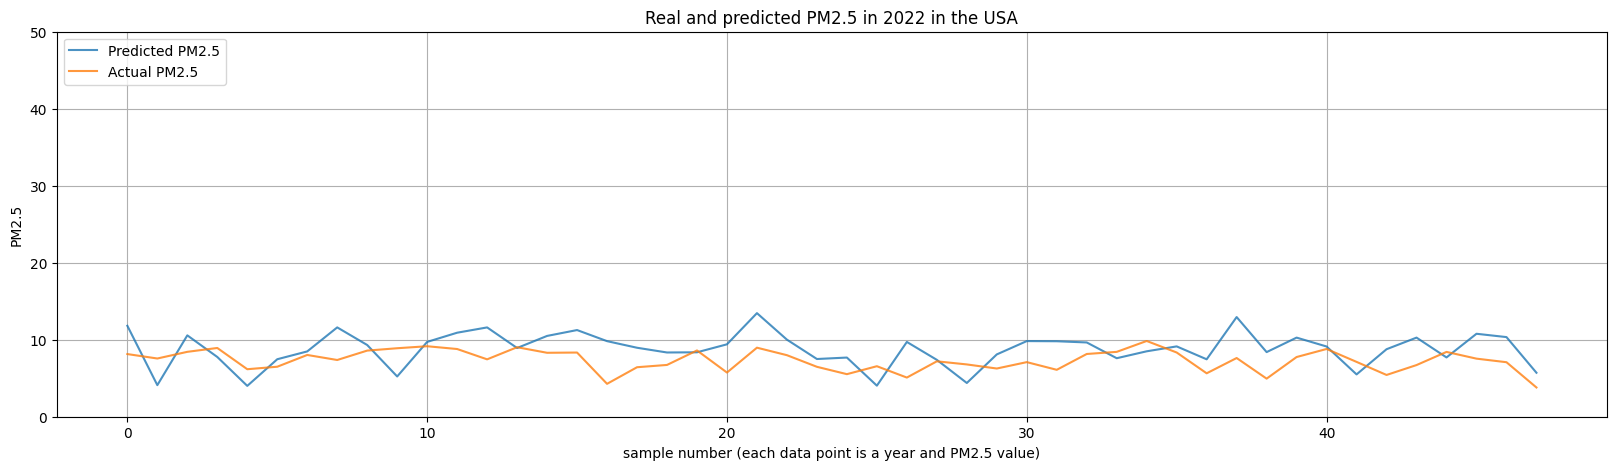

In [13]:
# plotting actual vs predicted PM2.5
plt.figure()
plt.figure(figsize=(20, 5))
plt.plot(predicted_pm25["Predicted PM2.5"], alpha=0.8, label="Predicted PM2.5")
plt.plot(predicted_pm25["PM2.5_2022_Actual"],alpha=0.8, label="Actual PM2.5")
plt.xlabel("sample number (each data point is a year and PM2.5 value)")
plt.ylabel("PM2.5")
plt.legend(loc="upper left")
plt.title("Real and predicted PM2.5 in 2022 in the USA")
plt.ylim(0,50)
plt.grid()
plt.show()